# Sensitivity Analysis_CP

In [2]:
import numpy as np
import pandas as pd

data = pd.read_excel("2024_02_22.xlsx", sheet_name= 'GCE', header=None)
data.head(32)

,0,1,2,3,4,5,6,7,8,9,10
0,TC(總成本),299606824.347194,298715978.004535,299446932.252471,298626808.913626,297603496.990553,298600874.186353,299405758.89265,298348638.506767,299429710.604658,299623326.910447
1,TC1(加工),266981941.0,266981941,266981941,266981941,266981941,266981941,266981941,266981941,266981941,266981940.999998
2,TC2(設置),3119,3495,2579,3027,2462,3069,2774,2728,3522,2481
3,TC3(達交),31780792.583688,30889615.241029,31621545.488966,30801046.15012,29778389.227047,30775273.422848,31580567.129145,30523549.506767,31603827.604658,31798484.910449
4,TC4(買碳權),551.763506,506.763505,446.763505,374.763505,284.763506,170.763505,56.763505,0,0,0
5,TC5(賣碳權),0,0,0,0,0,0,0,78.236495,243.236495,438.236495
6,TC6(投資效率),840420,840420,840420,840420,840420,840420,840420,840420,840420,840420
7,TC7(投資節能),0,0,0,0,0,0,0,0,0,0
8,Phi_hat(生產效率),1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1
9,Eplison(節能效率),0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7


In [3]:
x_row = np.array(data.iloc[14, 1:].astype(str))
x_row

array(['0.62', '0.77', '0.97', '1.21', '1.51', '1.89', '2.27', '2.72',
       '3.27', '3.92'], dtype=object)

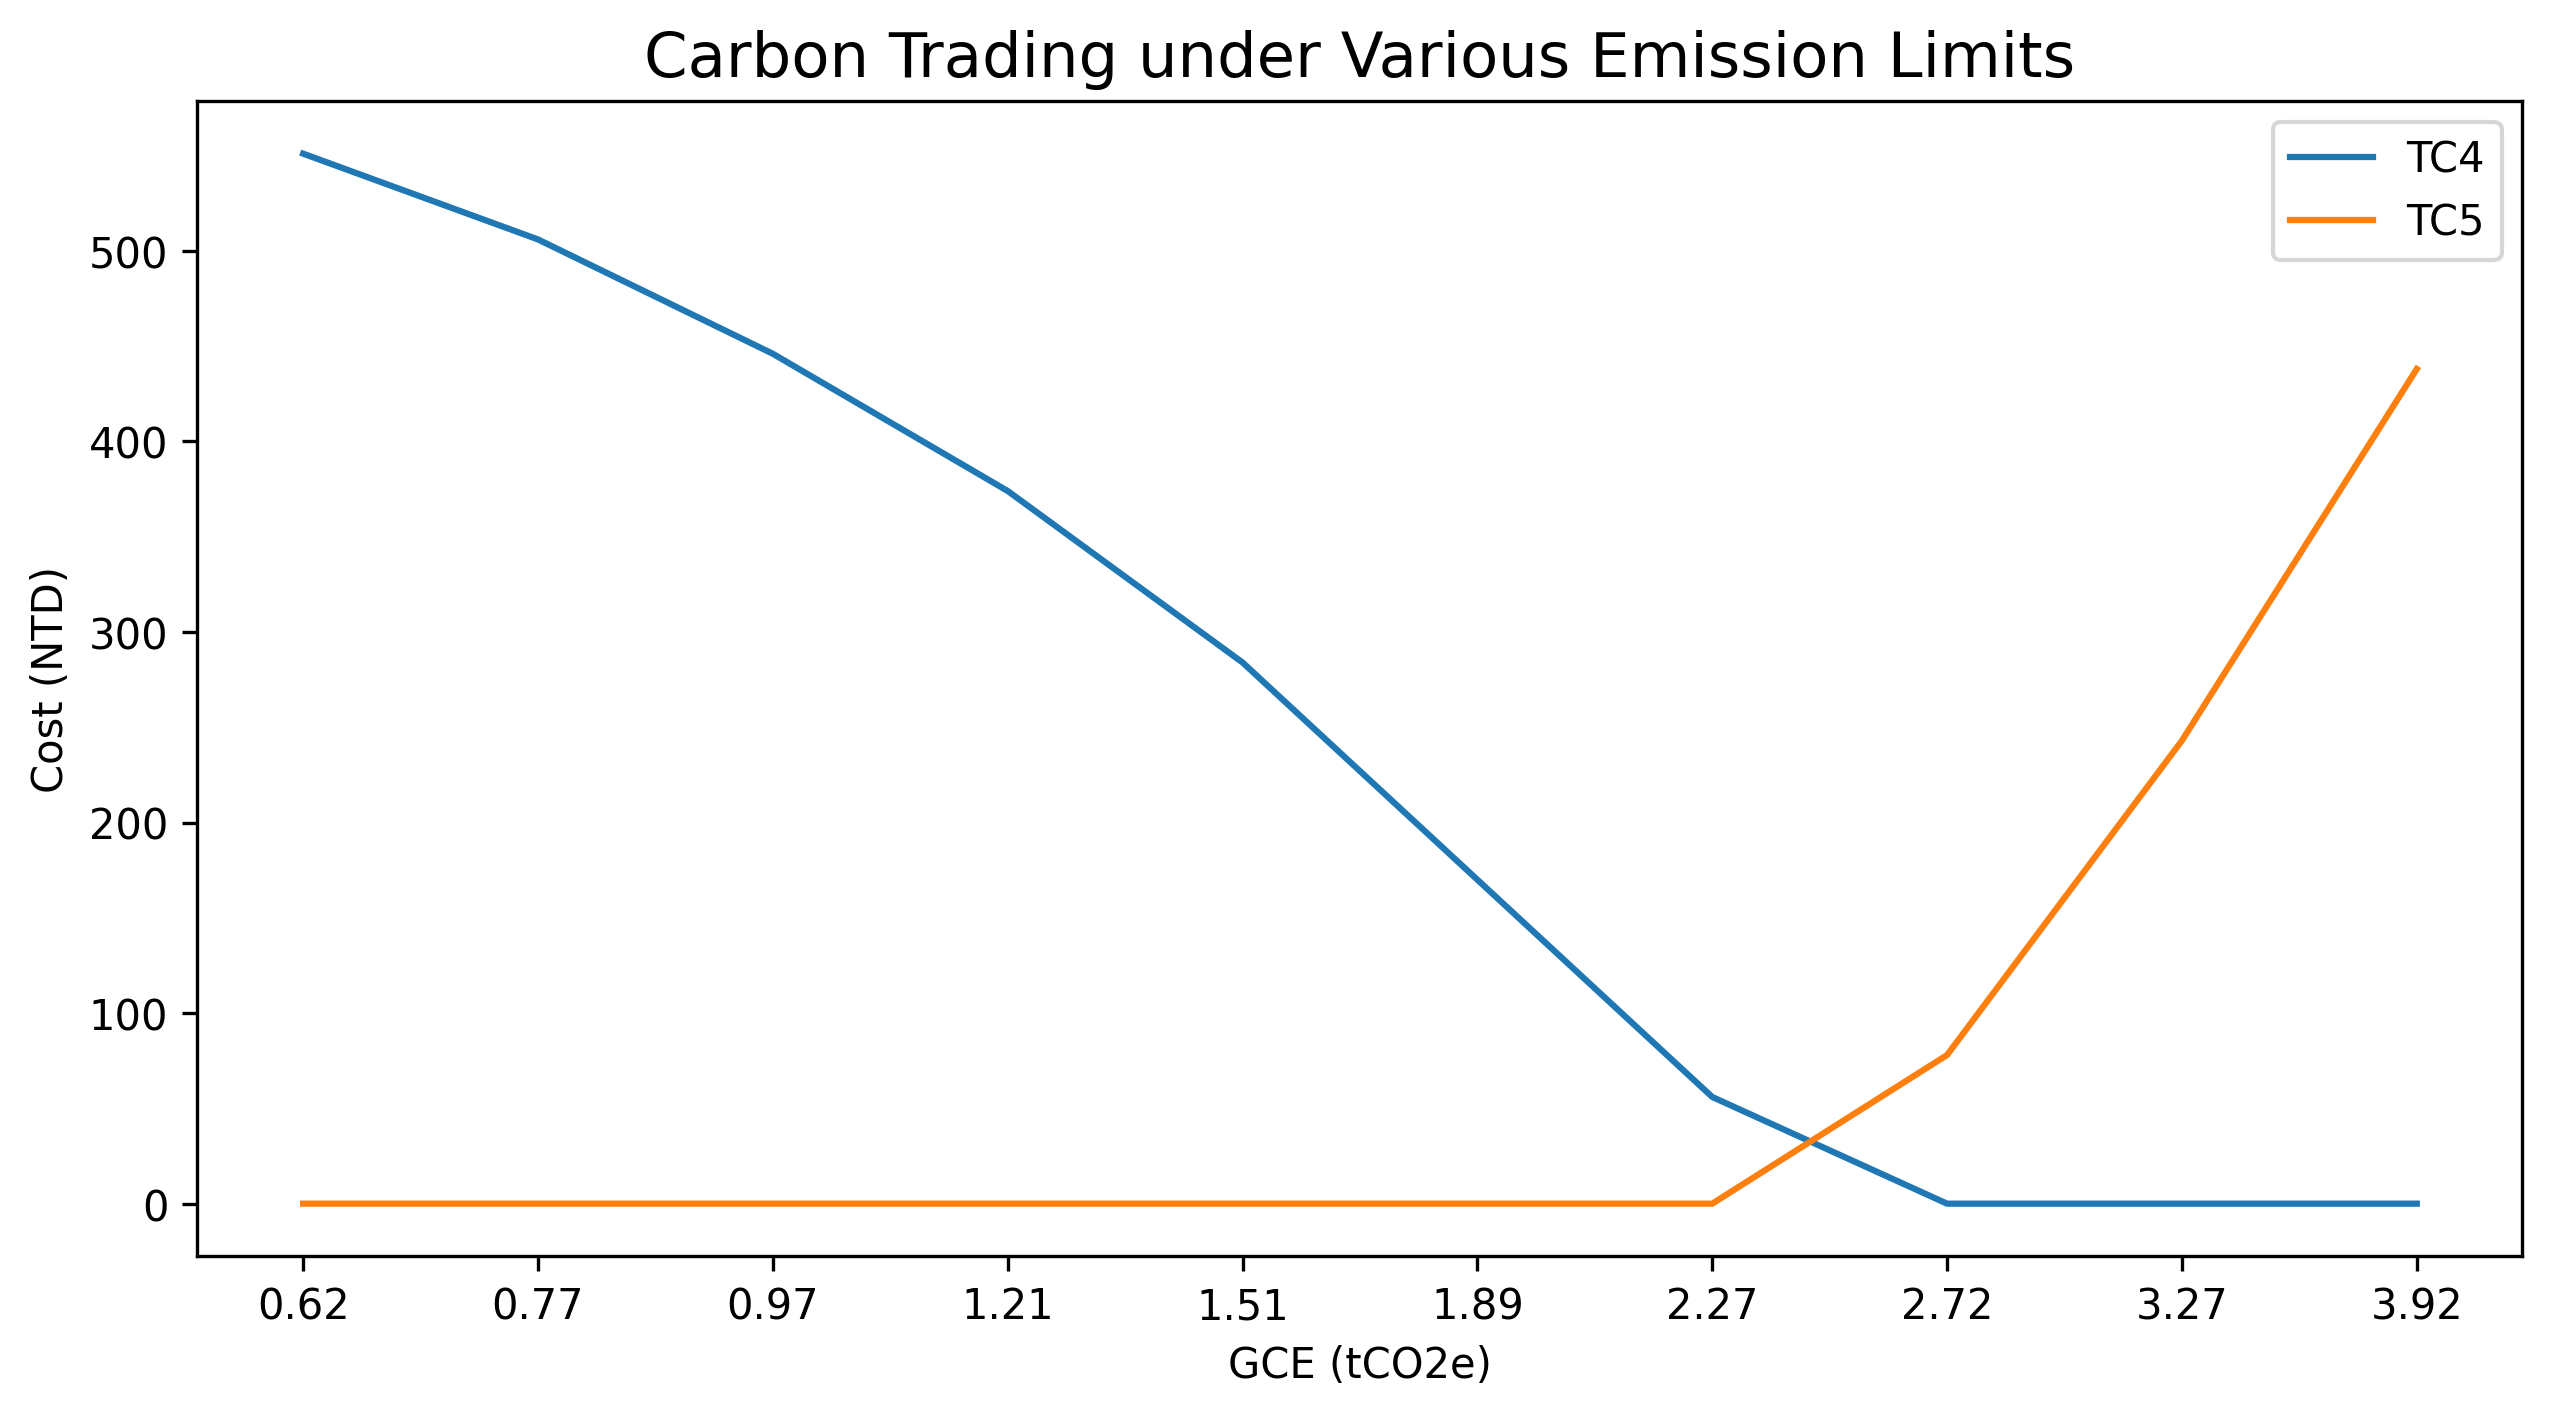

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=300)
for i in range(4, 6):
    plt.plot(x_row, np.array(data.iloc[i, 1:].astype(int)), label='TC%d'%i)
plt.xticks(x_row)

plt.title('Carbon Trading under Various Emission Limits', size=15)
plt.xlabel('GCE (tCO2e)', size=10)
plt.ylabel('Cost (NTD)', size=10)
plt.legend()

plt.show()

In [5]:
carbon_cost = []
for i in range(1, 1+len(data.iloc[4, 1:])):
    carbon_cost.append(data.iloc[4, i] - data.iloc[5, i])

carbon_cost

[551.7635056932164,
 506.7635053830429,
 446.7635053959923,
 374.7635054815238,
 284.7635055290835,
 170.763505427273,
 56.76350534803237,
 -78.23649462018443,
 -243.2364945876143,
 -438.2364945650208]

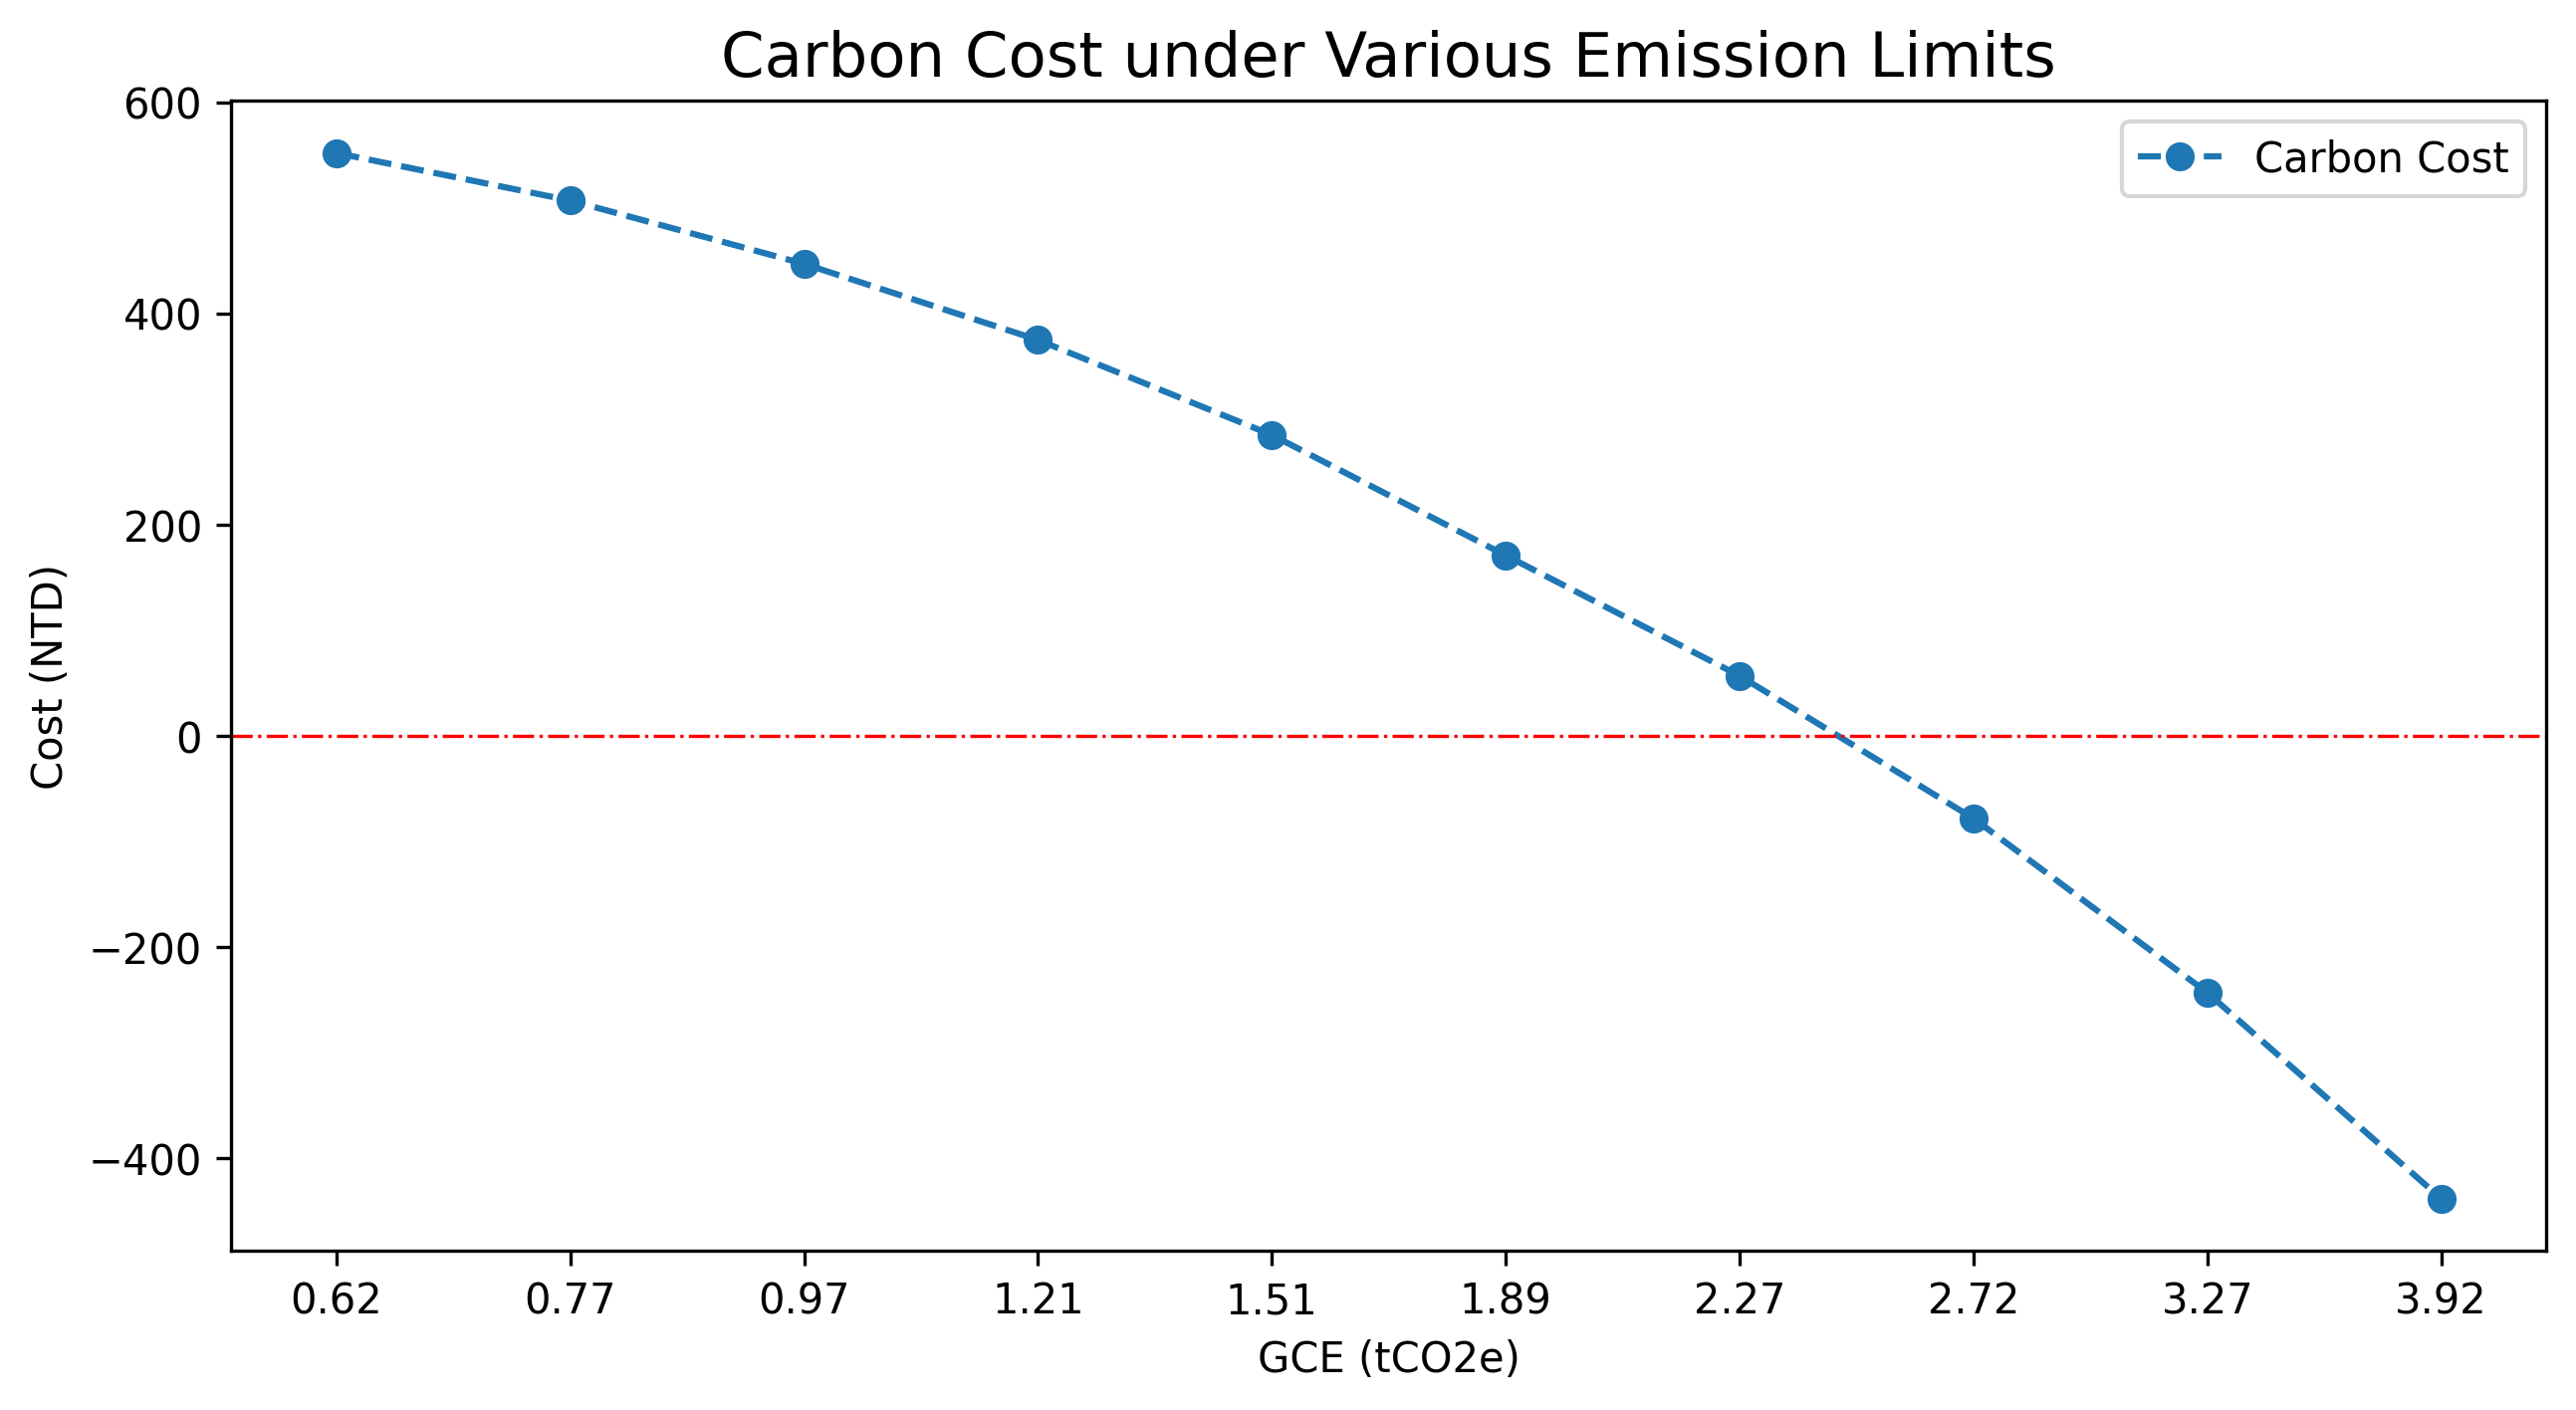

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=300)
plt.plot(x_row, carbon_cost, marker='o', linestyle='--', label='Carbon Cost')
plt.axhline(0, color='red', linestyle='-.', linewidth=0.8)
plt.xticks(x_row)

plt.title('Carbon Cost under Various Emission Limits', size=15)
plt.xlabel('GCE (tCO2e)', size=10)
plt.ylabel('Cost (NTD)', size=10)
plt.legend()

plt.show()